# Phase two project 


* student name : Julie Chepngeno

* course : DS Full Time

# VALUE ANALYSIS FOR HOUSE SALE PRICES IN KING COUNTY

1.Project Overview


a) introduction

At a Real Estate, buying or selling a home is one of the most significant financial decisions you'll make in your life. Our goal is to make the home buying or selling process as smooth and stress-free as possible for our clients. In this project,we will be analyzing house sales in a western county which can be found in kc_house_data.csv


 The real estate market serves as a reflection of societal aspirations, investment opportunities, and the pursuit of the elusive "dream home." Whether it's residential, commercial, or industrial, real estate offers a multitude of possibilities for individuals, businesses, and communities.It involves home owners looking to sell their property and home buyers looking to buy a dream home

b)problem statement

The  real estate agency needs to develop a comprehensive advisory framework to assist homeowners in understanding the potential value-adding effects of specific home renovations. This framework should include detailed information on the types of renovations, their estimated costs, and the potential increase in the property's value. By addressing this problem, the agency can empower homeowners to make informed decisions, thereby increasing their satisfaction, trust, and the likelihood of engaging the agency's services.

* Main objective

The main objective of the real estate agency's initiative is to provide homeowners with accurate and valuable advice regarding home renovations and their potential impact on the estimated value of their properties

* specific objectives

Develop a Comprehensive Renovation Advisory Framework: The agency aims to create a structured framework that outlines different renovation types and their potential impact on property value.

Track Success Metrics: The agency will track key success metrics, such as the number of homeowners served, the percentage of clients who reported increased property value, and the number of referrals received.

d) Data Understanding


In this project, the data was collected from a CSV (Comma-Separated Values) file. The dataset, kc_house_data.csv, contains information related to real estate properties in King County, Washington. It includes various attributes that describe the properties, such as their location, size, condition, and sale prices.

Analyzing the data set will help us to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

# 2) Importing libraries

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
%matplotlib inline


  Reading and checking the data

In [3]:
#loading kc_house_data.csv
df = pd.read_csv("kc_house_data.csv")
# Display the first few rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Obtaining info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

checking and dropping duplicated values

In [5]:
# Check for duplicated values
df.id.duplicated().sum()



177

we have a total of 177 duplicates out of 21597 entries in the house unique identifier 'id'

In [6]:
# Display duplicates
df.loc[df["id"].duplicated()==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


The column "id" is a unique identifier therefore we drop those that are duplicated and retain the first entry
implace=True i added to ensure the chane is carried forward when the data is called again


In [7]:
# dropping duplicates
df.drop_duplicates(subset="id", inplace=True)

Checking and dropping null values

In [8]:
# checking for null value in the dataset
def drop_null(data, subset, axis): # Subset should be a list
 """A simple function to find null entries and drop them"""
 print(f"{df.isna().sum()}")
 df.dropna(subset=subset, inplace=True, axis=axis)
drop_null(df, ['yr_renovated', 'waterfront'], 0)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In the above cell, we dropped rows with null values in the categorical columns as it would not be wise to fill them with biased information.


# EDA

In [9]:
for column in df.columns:
 print(df[column].value_counts())

6414100192    1
3333002450    1
1326049170    1
3043200035    1
1424069044    1
             ..
1446400725    1
4030500130    1
3319500299    1
7139800020    1
1523300157    1
Name: id, Length: 15691, dtype: int64
6/25/2014     103
6/23/2014     102
10/28/2014     94
7/8/2014       93
7/14/2014      93
             ... 
1/10/2015       1
7/4/2014        1
8/3/2014        1
11/2/2014       1
8/31/2014       1
Name: date, Length: 370, dtype: int64
350000.0    130
450000.0    121
500000.0    114
425000.0    111
550000.0    111
           ... 
169900.0      1
342450.0      1
511500.0      1
685900.0      1
402101.0      1
Name: price, Length: 3030, dtype: int64
3     7082
4     5070
2     1991
5     1177
6      189
1      138
7       23
8       10
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    3996
1.00    2736
1.75    2218
2.25    1484
2.00    1383
1.50    1052
2.75     851
3.50     542
3.00     540
3.25     429
3.75     104
4.00      99
4.50      74
4.25

In [10]:
df.condition.value_counts()

Average      10170
Good          4132
Very Good     1245
Fair           125
Poor            19
Name: condition, dtype: int64

In [11]:
to_replace = {"Poor": 1, "Fair": 2,"Average": 3, "Good": 4, "Very Good": 5}
df.condition = df.condition.map(to_replace)
df.condition.value_counts()

3    10170
4     4132
5     1245
2      125
1       19
Name: condition, dtype: int64

* In the above cell,the condition ratings are converted into a discrete variable
* The changes show from 1 to 5,where the lowest has 1 as poor,with the midpoint 3 as average,and the highest 5 as very good

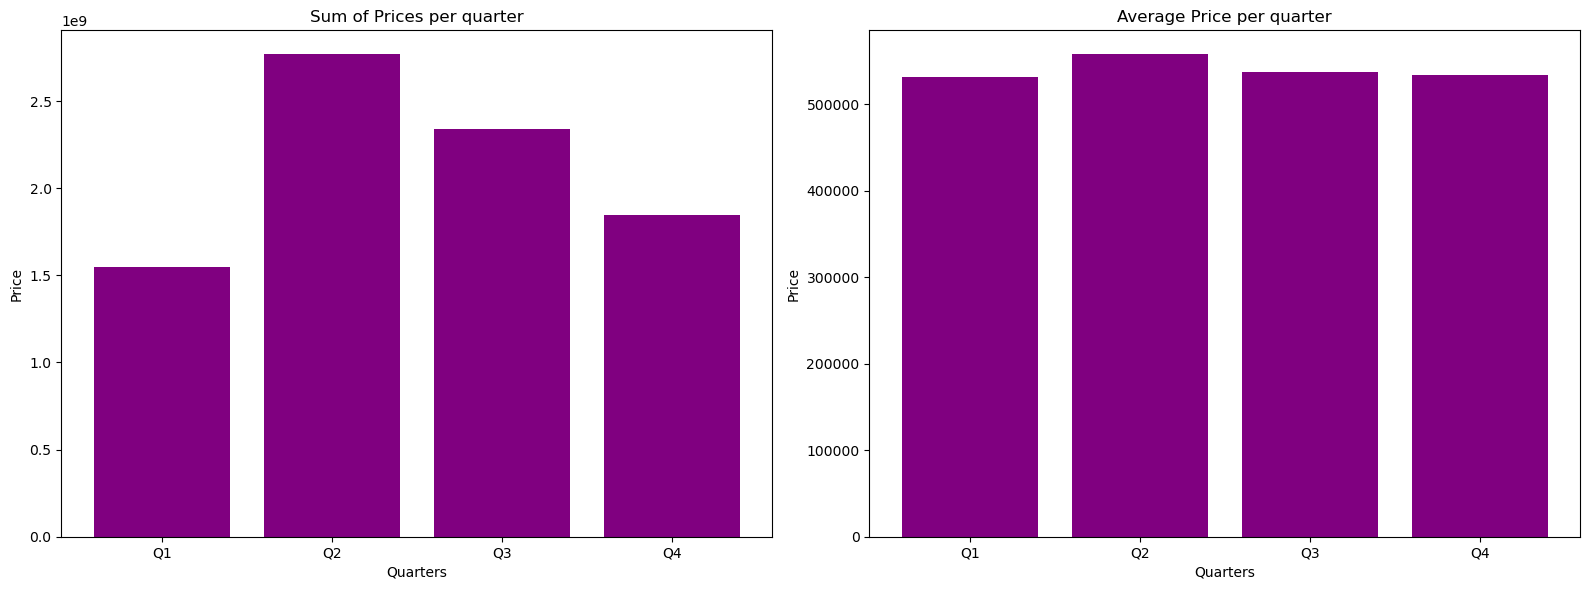

In [12]:
# Converting 'date' column to date-time format
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month.astype(str)
# Converting to quartes
def replace_quarters(x):
 """A bit complex but simple function to demarcate months into quarters"""
 x = int(x)
 if x <= 3:
  str_ = str(x).replace(str(x), "Q1")
 elif 4 <= x <= 6:
  str_ = str(x).replace(str(x), "Q2")
 elif 7 <= x <= 9:
  str_ = str(x).replace(str(x), "Q3")
 elif 10 <= x <= 12:
  str_ = str(x).replace(str(x), "Q4")
 return str_
# Replacing in the column
df["month"] = df['month'].map(replace_quarters)
# Visualizing
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
plot_sum = df.groupby("month")["price"].sum()
plot_mean = df.groupby("month")["price"].mean()
ax[0].bar(plot_sum.index, plot_sum.values, color='purple')
ax[1].bar(plot_mean.index, plot_mean.values, color='purple')
ax[0].set(ylabel='Price', xlabel='Quarters', title='Sum of Prices per quarter')
ax[1].set(ylabel='Price', xlabel='Quarters', title='Average Price per quarter')

plt.tight_layout()
plt.show()

* There is no much difference between the quarters except that the average price in quarter 2 is slightly higher than the rest
* There are columns in the dataset tat may not be useful in evaluation and we drop them by initializing the list called dropped and then dropping thm from our dataset

In [13]:
# Initializing a list for columns to drop
def drop_cols(data, subset, axis):
 """A simple function to drop columns"""
 data.drop(subset, axis=axis, inplace=True)
 
dropped = ['id', 'date', 'view', 'lat', 'long', 'month']
drop_cols(df, dropped, 1)

* In the cells below, the column 'grade' is split for its values and only the first section is singled out to be converted into numeric type and used
as a scale for measuring the grade of the houses / properties
* Shifting has been done so that the grading parameters may start from 1.
* From 1 to 11, where the lowest has 1 as poor, with a midpoint of 7 as average and the highest being 11 as mansion

In [14]:
# checking the grading system used in the dataset
df['grade'].value_counts()


7 Average        6504
8 Good           4429
9 Better         1922
6 Low Average    1459
10 Very Good      832
11 Excellent      288
5 Fair            163
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64

In [15]:
# Converting the 'grade' column to numeric dtype and shifting the scale by 2
df['grade'] = df['grade'].map(lambda x: x.split(' ')[0]).astype(int) - 2


In [16]:
# Transforming 'yr_renovated' column into a categorical variable with `renovated` and `not_renovated` 
def replace(x):
 """A simple function to categorize the column into renovated and not_renovated"""
 if x > 0:
  str_ = str(x).replace(str(x), "renovated")
 else:
  str_ = str(x).replace(str(x), "not renovated")
 return str_
# Renaming our coulumn and calling our function on the dataset
df['renovated'] = df.yr_renovated.map(replace)
# Viewing the changes
df.renovated.value_counts()
# Dropping the original column
df.drop('yr_renovated', axis=1, inplace=True)

* Replacing the '?' in the column 'sqft_basement' with zero values since the entries in those columns showed similar areas for "sqft_living" and
"sqft_above'


In [17]:
# Replacing the '?' character with "0.0"
df['sqft_basement'].replace({'?': "0.0"}, inplace=True)
# Converting the column 'sqft_basement' to an integer column
df['sqft_basement'] = df.sqft_basement.astype(float)

# Checking for outliers in the price column

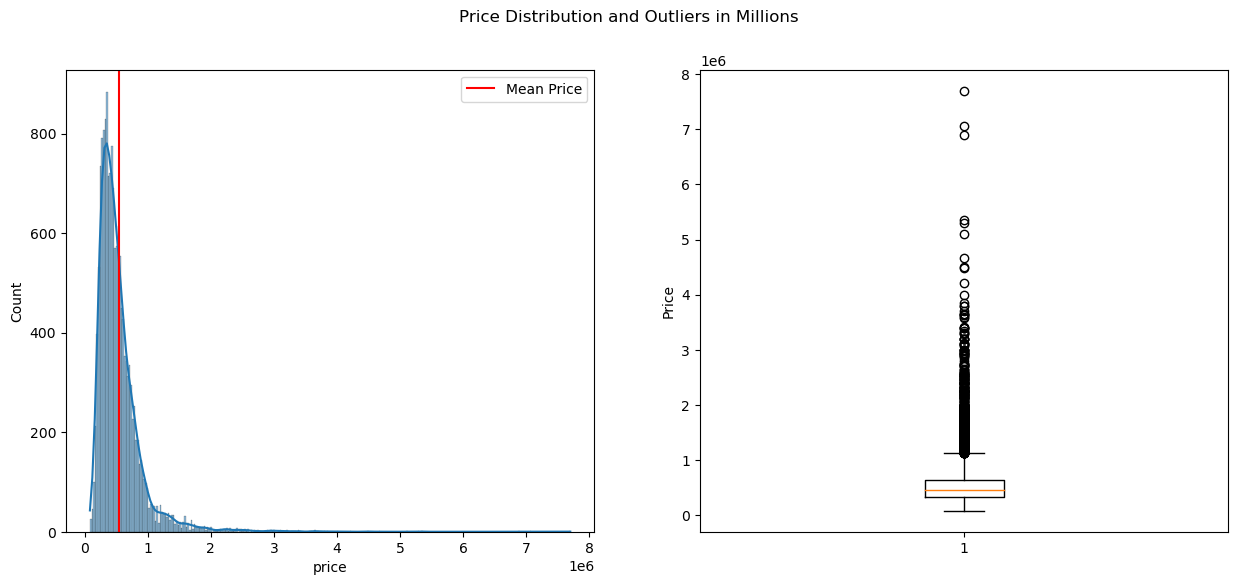

In [18]:
# Creating a figure space and visualizing
fig, ax = plt.subplots(figsize=(15,6), ncols=2)
# Histogram
sns.histplot(df.price, kde=True, ax=ax[0])
ax[0].axvline(df['price'].mean(), color='red', label="Mean Price")
# Boxplot
ax[1].boxplot(df['price'])
ax[1].set_ylabel("Price")
ax[0].legend()
# Title and showing
fig.suptitle("Price Distribution and Outliers in Millions")
plt.show()


from the above visualizations, we see that a majority of the price distributions lie between 0 and 1.2 million with those beyond this considered
as outliers. On the other hand, we consider these prices to be important for our analysis except those above 5 million that we considered as
genuine outliers which we will drop

In [19]:
# obtaining descriptive statistics on our dataset
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.569100e+04,15691.000000,15691.000000,15691.000000,1.569100e+04,15691.000000,15691.000000,15691.000000,15691.000000,15691.000000,15691.000000,15691.000000,15691.000000,15691.000000
mean,5.418726e+05,3.379899,2.122761,2087.263654,1.531265e+04,1.496877,3.411637,5.667899,1794.994392,286.151106,1971.194761,98077.487796,1992.025174,12924.724046
std,3.743919e+05,0.934517,0.766978,919.928706,4.197367e+04,0.539743,0.651235,1.171426,829.131366,441.378587,29.347124,53.367570,684.215334,28067.038608
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,98001.000000,399.000000,659.000000
25%,3.219750e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,3.000000,5.000000,1200.000000,0.000000,1952.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,3.000000,5.000000,1570.000000,0.000000,1975.000000,98065.000000,1850.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2558.500000,1.071200e+04,2.000000,4.000000,6.000000,2220.000000,540.000000,1997.000000,98117.000000,2370.000000,10102.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,11.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [21]:
# Showcasing the maximum, average and minimum market prices
print(f"""
 The average price in King County is {round(df.price.mean(), 2)},
 it has the hihgest price and lowest price being {round(df.price.max())} and {round(df.price.min())} respectively
 """)


 The average price in King County is 541872.57,
 it has the hihgest price and lowest price being 7700000 and 82000 respectively
 


# Modelling

Checking our dataset for columns with high multicolinearity and dropping them as well due to their redundancy


In [22]:
def model_results(y, X):
 """A perfect use of a simple function to fit the models"""
 model = sm.OLS(y, sm.add_constant(X))
 fit = model.fit()
 return fit


In [23]:
# Checking for Multicollinearity in our predictors
corr_df = df.corr(numeric_only=True).abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
# Dropping 'level_0' and 'level_1' 
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_0', 'level_1'], inplace=True)
# Renaming our column
corr_df.columns = ["corr_coef"]


In [24]:
# Veiwing the highly correlated predictor pairs
corr_df[(corr_df.corr_coef > 0.75) & (corr_df.corr_coef < 1)]


,corr_coef
pairs,
"(sqft_above, sqft_living)",0.876111
"(sqft_living, sqft_above)",0.876111
"(sqft_living, grade)",0.764588
"(grade, sqft_living)",0.764588
"(grade, sqft_above)",0.758671
"(sqft_above, grade)",0.758671
"(sqft_living, sqft_living15)",0.756656
"(sqft_living15, sqft_living)",0.756656
"(sqft_living, bathrooms)",0.754082


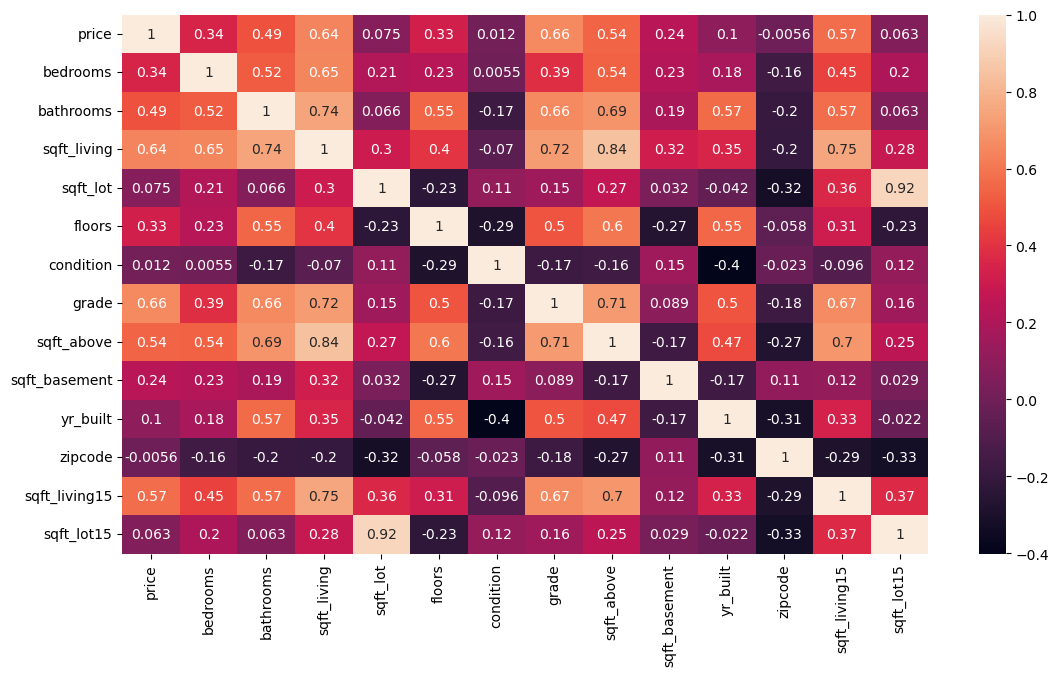

In [25]:
# Visualizing the correlation between predictors
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True);

From the observations made above we see that there is a very high correlation between the predictor columns of
'sqft_above', 'sqft_living', 'sqft_living15, 'grade',and 'bathrooms'. Dropping some of these will eliminate
multicollinearity features.
The columns to drop will be 'sqft_above', 'sqft_living15', 'grade',and 'bathrooms'

In [26]:
#  Initializing a list of columns to drop
high_corr_pred = ['sqft_above', 'sqft_living15', 'grade', 'bathrooms']
# Dropping the columns permanently 
drop_cols(df, high_corr_pred, 1)
# Viewing the the remaining dataset
print(df.shape)
df.head()


(15691, 12)


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,zipcode,sqft_lot15,renovated
1,538000.0,3,2570,7242,2.0,NO,3,400.0,1951,98125,7639,renovated
3,604000.0,4,1960,5000,1.0,NO,5,910.0,1965,98136,5000,not renovated
4,510000.0,3,1680,8080,1.0,NO,3,0.0,1987,98074,7503,not renovated
5,1230000.0,4,5420,101930,1.0,NO,3,1530.0,2001,98053,101930,not renovated
6,257500.0,3,1715,6819,2.0,NO,3,0.0,1995,98003,6819,not renovated


# Fitting the baseline model

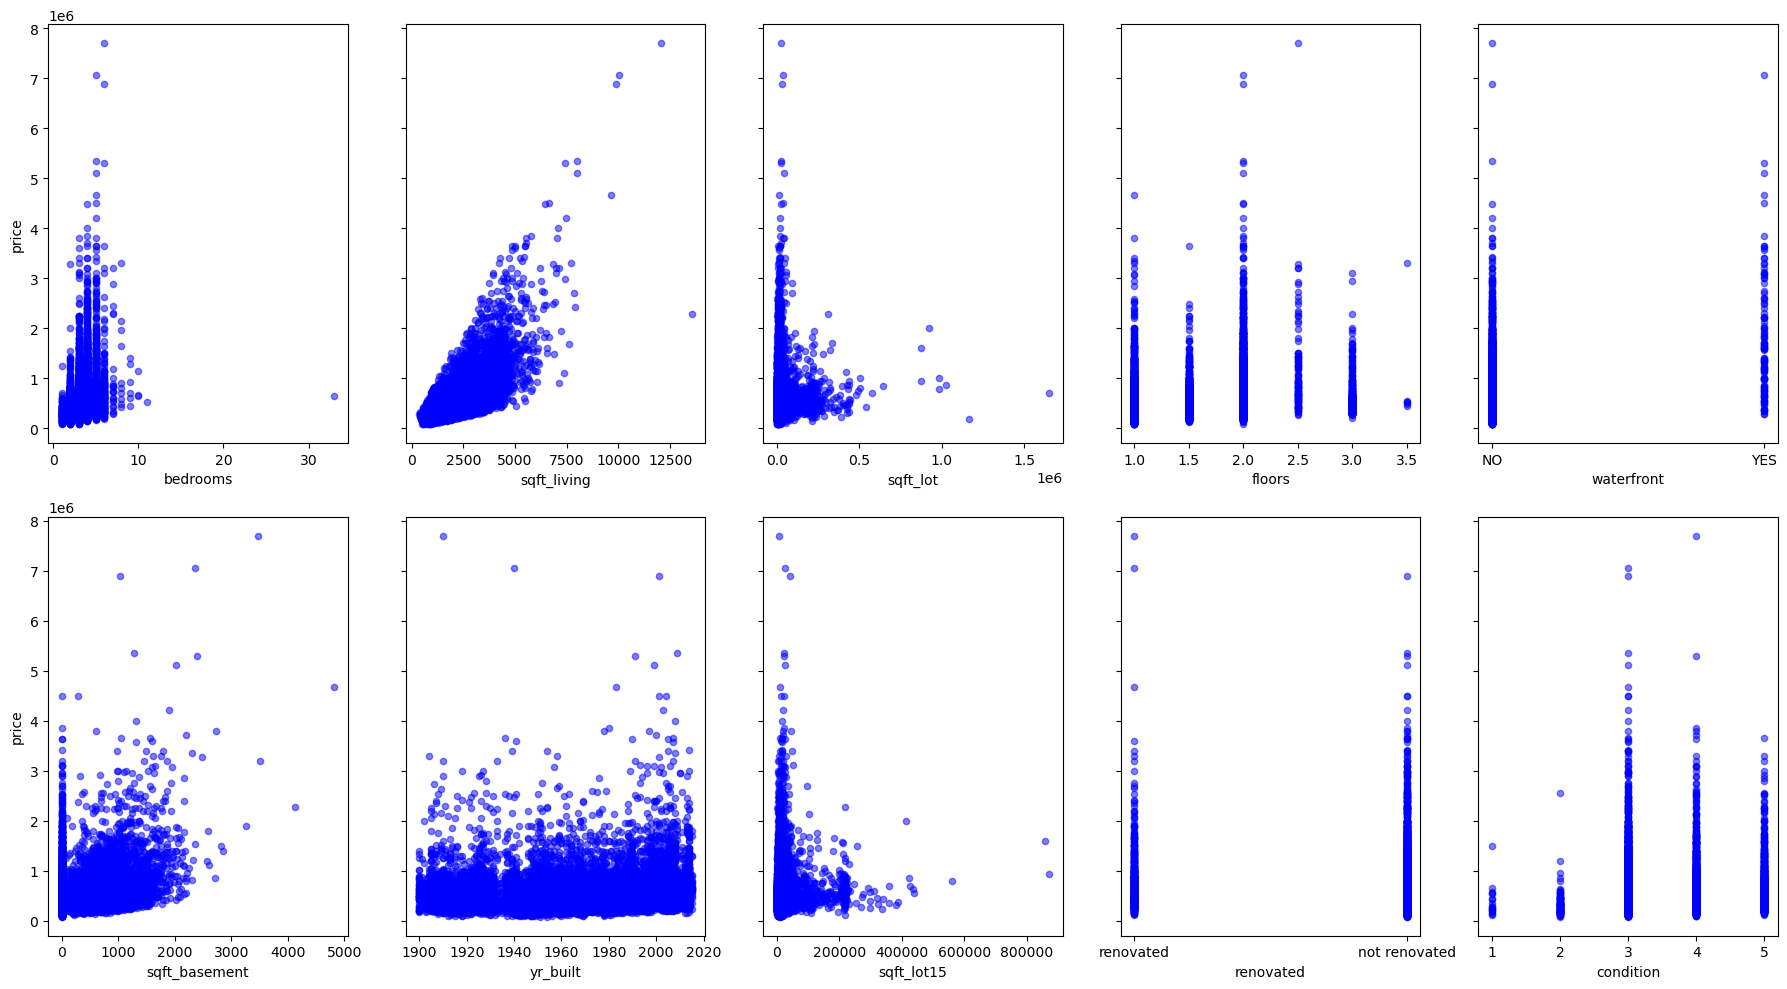

In [28]:
# Visualization of the predictor relationships with price
fig = plt.figure(figsize=(18,10))
axes = fig.subplots(nrows=2, ncols=5, sharey=True)
for xcol, ax in zip(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',\
 'sqft_basement', 'yr_built', 'sqft_lot15', 'renovated', 'condition'], axes.flatten()):
 df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5, color='blue')
 
plt.tight_layout()
plt.show()

In [29]:
# Checking for the highly correlated
df.corr(numeric_only=True)['price']

price            1.000000
bedrooms         0.306573
sqft_living      0.706341
sqft_lot         0.082954
floors           0.258315
condition        0.033602
sqft_basement    0.318285
yr_built         0.048950
zipcode         -0.048485
sqft_lot15       0.078430
Name: price, dtype: float64

In [30]:
# Determining the variables
y = df['price']
X_baseline = df[['sqft_living']]

In [32]:
# Fitting the model
baseline_results = model_results(y, X_baseline)
# Our summary
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.562e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:24:53   Log-Likelihood:            -2.1821e+05
No. Observations:               15691   AIC:                         4.364e+05
Df Residuals:                   15689   BIC:                         4.364e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.815e+04   5246.275    -11.083      

* The model is generally statistically sigmificant at a significance level of with a _value of 0.0, and
explains about 49% of the variance in price.
* The constant and coefficient are statistically significant.
* For a unit increase in square-foot living area, we see an associated increase in 275 dollars in selling price of the
houses.

In [33]:
# Fitting a multiple regression 
X_multiple = df.copy().drop(['price', 'zipcode'], axis=1)
X_multiple = pd.get_dummies(X_multiple, columns=['waterfront', 'renovated'], drop_first=True)
X_multiple

,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,sqft_lot15,waterfront_YES,renovated_renovated
1,3,2570,7242,2.0,3,400.0,1951,7639,0,1
3,4,1960,5000,1.0,5,910.0,1965,5000,0,0
4,3,1680,8080,1.0,3,0.0,1987,7503,0,0
5,4,5420,101930,1.0,3,1530.0,2001,101930,0,0
6,3,1715,6819,2.0,3,0.0,1995,6819,0,0
...,...,...,...,...,...,...,...,...,...,...
21591,3,1310,1294,2.0,3,130.0,2008,1265,0,0
21592,3,1530,1131,3.0,3,0.0,2009,1509,0,0
21593,4,2310,5813,2.0,3,0.0,2014,7200,0,0
21594,2,1020,1350,2.0,3,0.0,2009,2007,0,0


In [34]:
# Fittng our multiple regression model
multiple_results = model_results(y, X_multiple)
print(multiple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2277.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:29:41   Log-Likelihood:            -2.1659e+05
No. Observations:               15691   AIC:                         4.332e+05
Df Residuals:                   15680   BIC:                         4.333e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.024e+06   1

* The model overall is statistically significant at standard alpha of 0.05 being 0.0, and it explains 58% percent of the
variance in sale price.
* The model coefficients are statistically significant except for "sqft_lot".
* In comparison to our baseline model, our multiple model is an improvement with explained variance in price from
49% to 58%
* The constant here explains that all factors held constant, and a house with no waterfront and not renovated, we
would have a sale price of 4,844,000 dollars


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


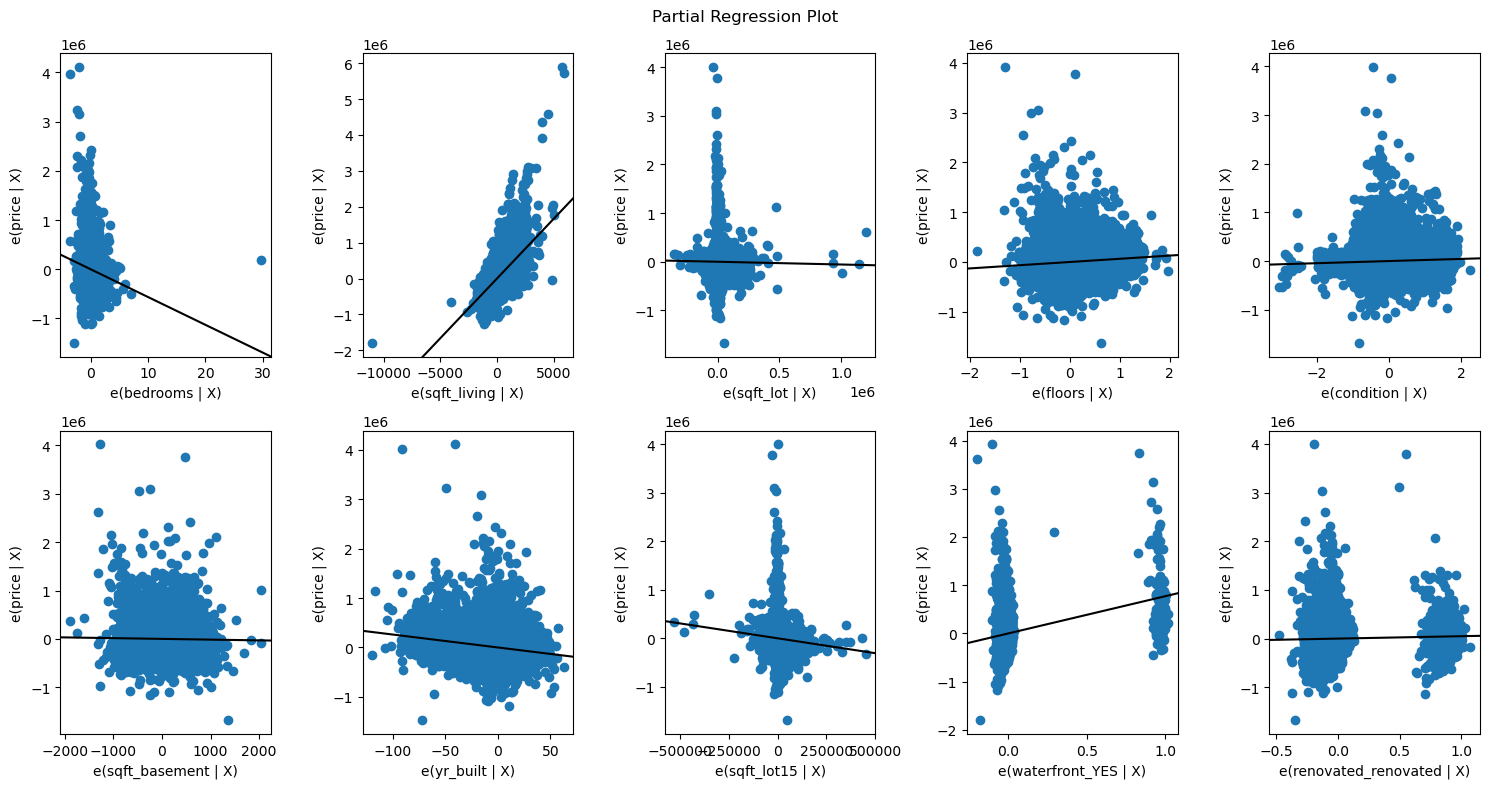

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
 multiple_results,
 exog_idx=list(X_multiple.columns.values),
 grid=(2,5),
 fig=fig)
plt.tight_layout()
plt.show()

# Shifting and centering

In [38]:
# Preparing data for shifting and centering
categorical_cols = ['yr_built', 'waterfront_YES', 'renovated_renovated']
numeric_cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'sqft_lot15', 'condition']
# Doing the centering 
X_centred = X_multiple[numeric_cols]
for col in X_centred.columns:
 X_centred[col] = X_centred[col] - X_centred[col].mean()
# Viewing the centred dataset 
X_centred


C:\Users\user\AppData\Local\Temp\ipykernel_2932\2564494513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_centred[col] = X_centred[col] - X_centred[col].mean()


,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_lot15,condition
1,-0.379899,482.736346,-8070.645402,0.503123,113.848894,-5285.724046,-0.411637
3,0.620101,-127.263654,-10312.645402,-0.496877,623.848894,-7924.724046,1.588363
4,-0.379899,-407.263654,-7232.645402,-0.496877,-286.151106,-5421.724046,-0.411637
5,0.620101,3332.736346,86617.354598,-0.496877,1243.848894,89005.275954,-0.411637
6,-0.379899,-372.263654,-8493.645402,0.503123,-286.151106,-6105.724046,-0.411637
...,...,...,...,...,...,...,...
21591,-0.379899,-777.263654,-14018.645402,0.503123,-156.151106,-11659.724046,-0.411637
21592,-0.379899,-557.263654,-14181.645402,1.503123,-286.151106,-11415.724046,-0.411637
21593,0.620101,222.736346,-9499.645402,0.503123,-286.151106,-5724.724046,-0.411637
21594,-1.379899,-1067.263654,-13962.645402,0.503123,-286.151106,-10917.724046,-0.411637


In [39]:
# Concatenating
X_centred = pd.concat([X_centred, X_multiple[categorical_cols]], axis=1)
X_centred['yr_built'] = X_centred['yr_built'] - 1900
X_centred

,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_lot15,condition,yr_built,waterfront_YES,renovated_renovated
1,-0.379899,482.736346,-8070.645402,0.503123,113.848894,-5285.724046,-0.411637,51,0,1
3,0.620101,-127.263654,-10312.645402,-0.496877,623.848894,-7924.724046,1.588363,65,0,0
4,-0.379899,-407.263654,-7232.645402,-0.496877,-286.151106,-5421.724046,-0.411637,87,0,0
5,0.620101,3332.736346,86617.354598,-0.496877,1243.848894,89005.275954,-0.411637,101,0,0
6,-0.379899,-372.263654,-8493.645402,0.503123,-286.151106,-6105.724046,-0.411637,95,0,0
...,...,...,...,...,...,...,...,...,...,...
21591,-0.379899,-777.263654,-14018.645402,0.503123,-156.151106,-11659.724046,-0.411637,108,0,0
21592,-0.379899,-557.263654,-14181.645402,1.503123,-286.151106,-11415.724046,-0.411637,109,0,0
21593,0.620101,222.736346,-9499.645402,0.503123,-286.151106,-5724.724046,-0.411637,114,0,0
21594,-1.379899,-1067.263654,-13962.645402,0.503123,-286.151106,-10917.724046,-0.411637,109,0,0


In [40]:
# fittimg model
centred_results = model_results(y, X_centred)
print(centred_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2277.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:40:50   Log-Likelihood:            -2.1659e+05
No. Observations:               15691   AIC:                         4.332e+05
Df Residuals:                   15680   BIC:                         4.333e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.199e+05   6

* The centred model is statistically significant as standard alpha of 0.05 being 0.0, and still explains 58% of the
variance in sale price.
* The centred model still explains the same amount of variance as the multiple model
* The model coefficients are statistically significant except for "sqft_lot".
* The constant here explains that for an average house that is not renovated, with no waterfront and built since
1900, we would have a sale price of 711,600 dollars


# Transformations

* considering our predictor scatterplots above, we would need to transform them to follow the assumption of linearity in L.I.N.E


In [44]:
# Transformations
log_cols = ['sqft_lot', 'sqft_lot15', 'sqft_living']
unlog_cols = ['bedrooms', 'condition', 'floors', 'sqft_basement', 'yr_built', 'waterfront_YES', 'renovated_renovated']
X_log = X_multiple[log_cols]
for col in X_log.columns:
 X_log[col] = X_log[col] - np.log(X_log[col])
X_log = pd.concat([X_log, X_multiple[unlog_cols]], axis=1)
X_log

C:\Users\user\AppData\Local\Temp\ipykernel_2932\30814496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_log[col] = X_log[col] - np.log(X_log[col])


,sqft_lot,sqft_lot15,sqft_living,bedrooms,condition,floors,sqft_basement,yr_built,waterfront_YES,renovated_renovated
1,7233.112347,7630.058978,2562.148339,3,3,2.0,400.0,1951,0,1
3,4991.482807,4991.482807,1952.419300,4,5,1.0,910.0,1965,0,0
4,8071.002853,7494.076942,1672.573451,3,3,1.0,0.0,1987,0,0
5,101918.467958,101918.467958,5411.402149,4,3,1.0,1530.0,2001,0,0
6,6810.172532,6810.172532,1707.552832,3,3,2.0,0.0,1995,0,0
...,...,...,...,...,...,...,...,...,...,...
21591,1286.834507,1257.857173,1302.822218,3,3,2.0,130.0,2008,0,0
21592,1123.969143,1501.680798,1522.666977,3,3,3.0,0.0,2009,0,0
21593,5804.332148,7191.118164,2302.254997,4,3,2.0,0.0,2014,0,0
21594,1342.792140,1999.395604,1013.072442,2,3,2.0,0.0,2009,0,0


In [45]:
# Fitting our log model
log_results = model_results(y, X_log)
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2277.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:51:27   Log-Likelihood:            -2.1659e+05
No. Observations:               15691   AIC:                         4.332e+05
Df Residuals:                   15680   BIC:                         4.333e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.026e+06   1

* In the above cell, log transformations did not assist in improving improving the model. The adjusted r-squared value remained constant. This
led to the need for considering other features affecting the variability in selling price

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


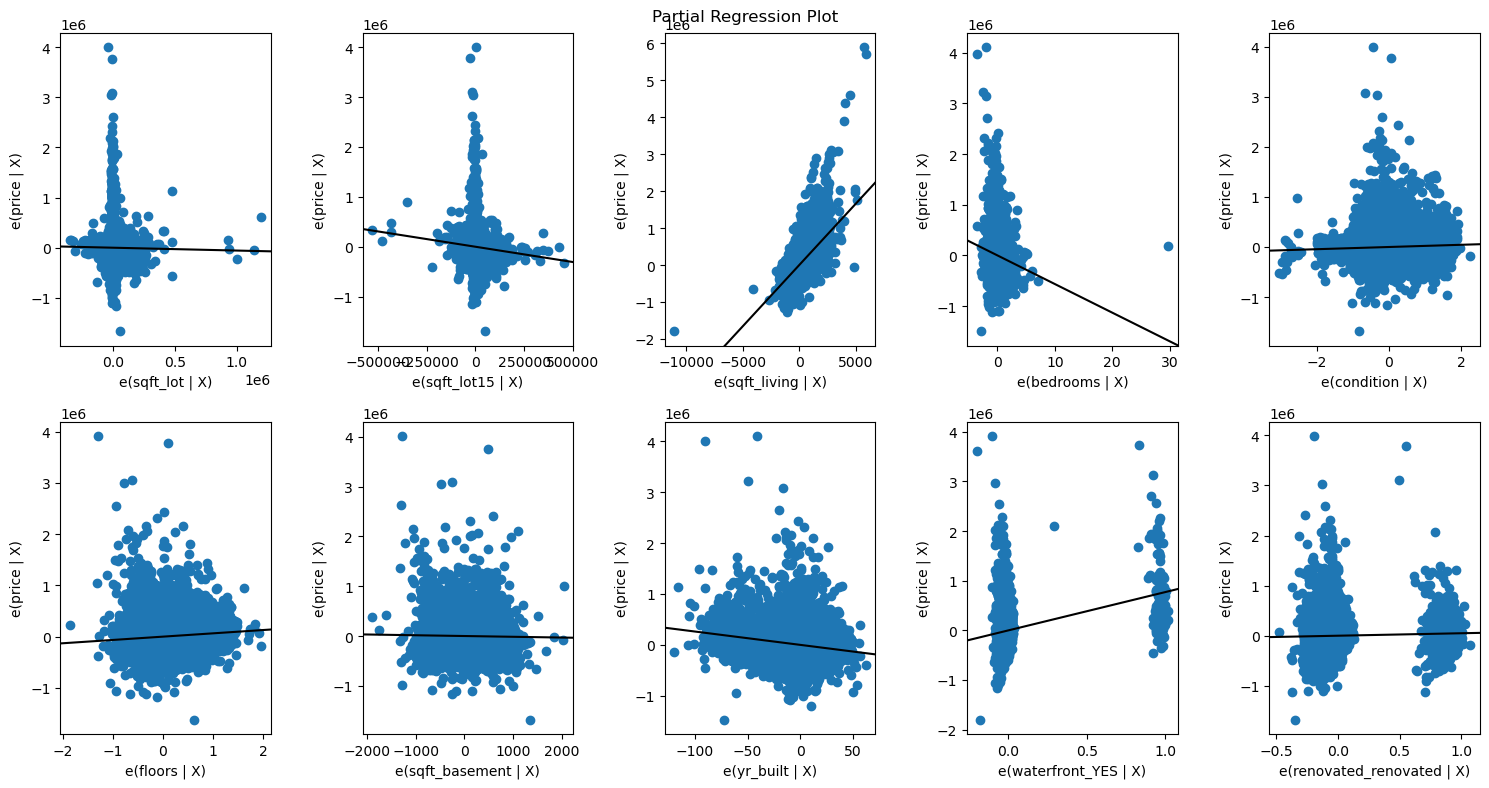

In [47]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
 log_results,
 exog_idx=list(X_log.columns.values),
 grid=(2,5),
 fig=fig)
plt.show()

In [48]:
# Adding 'zipcode ' column for ohe
X_multiple2 = df.copy().drop('price', axis=1)
X_multiple2 = pd.get_dummies(X_multiple2, columns=['waterfront', 'renovated', 'zipcode'], drop_first=True)
X_multiple2

,bedrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,sqft_lot15,waterfront_YES,renovated_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,3,2570,7242,2.0,3,400.0,1951,7639,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1960,5000,1.0,5,910.0,1965,5000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1680,8080,1.0,3,0.0,1987,7503,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,5420,101930,1.0,3,1530.0,2001,101930,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1715,6819,2.0,3,0.0,1995,6819,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,1310,1294,2.0,3,130.0,2008,1265,0,0,...,0,0,0,0,0,0,0,0,0,0
21592,3,1530,1131,3.0,3,0.0,2009,1509,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,4,2310,5813,2.0,3,0.0,2014,7200,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,2,1020,1350,2.0,3,0.0,2009,2007,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# fitting the model for it
multiple_results2 = model_results(y, X_multiple2)
print(multiple_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     720.8
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:55:54   Log-Likelihood:            -2.1157e+05
No. Observations:               15691   AIC:                         4.233e+05
Df Residuals:                   15611   BIC:                         4.239e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.817e+05   1

Text(0.5, 1.0, 'Residual Plot')

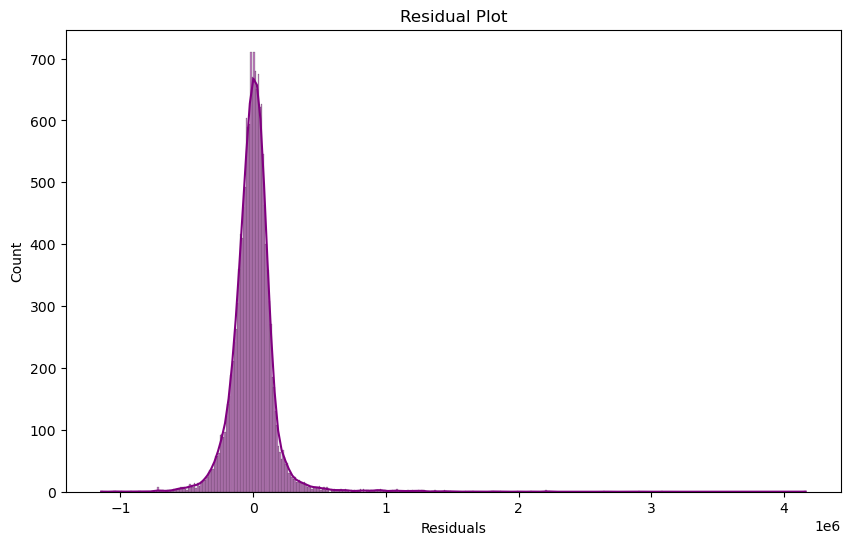

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(bins='auto', x=multiple_results2.resid, kde=True, color='purple');
plt.xlabel('Residuals')
plt.title("Residual Plot")

In [52]:
multiple_results2_df = pd.concat([multiple_results2.params, multiple_results2.pvalues], axis=1)
multiple_results2_df.columns = ["coefficient", "pvalue"]
multiple_results2_df

,coefficient,pvalue
const,-181738.183574,2.151542e-01
bedrooms,-36373.972664,4.214033e-83
sqft_living,297.062217,0.000000e+00
sqft_lot,0.263302,5.124160e-08
floors,-35620.938932,6.733407e-20
...,...,...
zipcode_98177,289092.833436,1.850873e-65
zipcode_98178,59622.570580,4.267632e-04
zipcode_98188,40786.194894,5.003492e-02
zipcode_98198,29413.406801,7.375780e-02


In [53]:
# Checking those that are not statistically significant
multiple_results2_df[multiple_results2_df["pvalue"] > 0.05]

,coefficient,pvalue
const,-181738.183574,0.215154
yr_built,-4.058373,0.955963
sqft_lot15,-0.064297,0.387147
zipcode_98002,15243.424317,0.398111
zipcode_98003,6191.142442,0.701274
zipcode_98010,41543.916947,0.080324
zipcode_98022,8406.653651,0.629386
zipcode_98023,-17236.943719,0.226217
zipcode_98030,-2422.125527,0.885589
zipcode_98031,13862.952382,0.398584


Our reference category is 98001 Auburn, Washington hence these zipcodes means that there is no significant differences in these areas
compared to Auburn.


# Findings

* The multiple linear regression model has an R-squared value of 0.79, which indicates that the model can explain 79% of the variance of the market
house sale prices which is a good sign that the model is effective in predicting the prices 
* The waterfront view was seen to be most impactful with houses having a waterfront view having value increase of about 834,000 dollars more than those
without a waterfront.This can be inferred for the other variables as well
* For an average house that is not renovated, with no waterfront and built since 1900, we would have a sale price of 711,600 dollars
* The combination of square footage of the living area, bedrooms, floors, and whether the property had a waterfront view or was renovated are the most
reliable predictors of a house's price in King County.


# Recommendations

* We recommend for customers on a budget should look out for houses situated on higher property floors as we expect a price drop on said houses of about
30,000 dollars for every floor increase
* Development of a comprehensive database the agency can use to track the renovation projects that would improve property value.
* For customers who would like to sell their properties/houses, it is recommended that they should renovate them first as we see these would be an
increase in value by about 48,000 dollars

CONCLUSION 
* The combination of square footage of the living area, bedrooms, floors, and whether the property had a waterfront view or was renovated are the most
reliable predictors of a house's price in King County.
* There were some limitations to the model. To meet regression assumptions, we had to try out log-transformation on certain variables. Therefore,any new data used with the model would require similar preprocessing. Additionally, since housing prices vary regionally, the model's usefulness for data from other counties may be restricted.
* If you are seeking affordable housing, it may be advisable to compromise on square footage and have no waterfront view. But, given that
many urban residents already do this, it may not be a viable solution for everyone

# Next steps


* Using datasets from other counties to be able to better advice our customers from comparing the dataset results.
* The agency may prepare questionnaires to identify their strengths, weaknesses, opportunities and threats and use this information to prioritize
recommendations that would help address their weaknesses and take advantge of their opportunities and strengths.
* It is also important for the agency to continuously monitor the effectiveness of the strategies they implement and make adjustments as necessary. This
could involve tracking metrics like website traffic, this model, social media engagement, and lead generation to assess the impact of their efforts and
identify areas for improvement.
* More research is required to have a more integrated and informative dataset finding more factors that influence the price